In [112]:
!git clone https://github.com/MinkyungPark/UsedCarPricePredict.git

fatal: destination path 'UsedCarPricePredict' already exists and is not an empty directory.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

In [0]:
dummy_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train-data.csv')
dummy_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [0]:
# 데이터 구조 확인
print('row 수 : {}, col 수 : {}'.format(dummy_data.shape[0], dummy_data.shape[1]))
dummy_data.head()

row 수 : 6019, col 수 : 14


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [0]:
### 데이터 전처리

# NaN 결측치 제거
clean_data = dummy_data.copy(deep=True)
# 6019 -> 813 너무 많이 손실
clean_data.dropna('index').shape # (813,14)

# New_Price 컬럼의 이상치 확인
print(str(clean_data.New_Price.isna().sum())) # 5195개 na

# New_Price, Unnaed:0 컬럼 제거
clean_data.drop(columns=['Unnamed: 0', 'New_Price'], inplace=True)

clean_data.dropna("index", inplace = True)
clean_data = clean_data.reset_index(drop = True)
clean_data.shape # (5975, 12)

5195


(5975, 12)

In [0]:
# 차종류 수 정의

len(np.unique(list(clean_data.Name))) # 1855 가지
# 차 종별 갯수가 2개 이상인 종류만해도 1034종
# 모델을 너무 복잡하게 해서 overfitting 초래 할 수 있음

# 차종에서 브랜드만 남기고 제거
names = list(clean_data.Name)
for i in range(len(names)):
  names[i]=names[i].split(' ', 1)[0]
clean_data.Name = names
clean_data.head()

len(np.unique(list(clean_data.Name))) # 31 브랜드

31

In [0]:
# Mileage의 km/kg제거 Engine의 CC제거, Power의 bhp제거

mileage = list(clean_data.Mileage)
engine = list(clean_data.Engine)
power = list(clean_data.Power)

for i in range(len(names)):
  mileage[i] = mileage[i].split(' ',1)[0]
  engine[i] = engine[i].split(' ',1)[0]
  power[i] = power[i].split(' ',1)[0]

clean_data.Mileage = mileage
clean_data.Engine = engine
clean_data.Power = power
clean_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [0]:
clean_data["Price"] = clean_data["Price"].astype(float)
clean_data["Kilometers_Driven"] = clean_data["Kilometers_Driven"].astype(float)
clean_data["Mileage"] = clean_data["Mileage"].astype(float)
clean_data["Engine"] = clean_data["Engine"].astype(float)
(clean_data.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                 object
Seats                float64
Price                float64
dtype: object

In [0]:
clean_data.isnull().sum() # null, none확인
clean_data['Power'].isnull().sum()

0

In [0]:
np.unique(list(clean_data.Name)) # 31

array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu',
       'Jaguar', 'Jeep', 'Lamborghini', 'Land', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche',
       'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype='<U13')

In [0]:
np.unique(list(clean_data.Location))

array(['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
       'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
      dtype='<U10')

In [0]:
np.unique(list(clean_data.Year))

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [0]:
np.unique(list(clean_data.Fuel_Type))

array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype='<U6')

In [0]:
np.unique(list(clean_data.Transmission))

array(['Automatic', 'Manual'], dtype='<U9')

In [0]:
np.unique(list(clean_data.Owner_Type))

array(['First', 'Fourth & Above', 'Second', 'Third'], dtype='<U14')

In [0]:
np.unique(list(clean_data.Seats))
# array([ 0.,  2.,  4.,  5.,  6.,  7.,  8.,  9., 10.])   0 ....?
clean_data=clean_data[clean_data.Seats != 0] # Seats=0인것 제거

In [0]:
print(clean_data.shape) # 5975->5974

(5974, 12)


In [0]:
np.unique(list(clean_data.Power)) # null이 있으나 isnull.sum에서는 안나옴.. 왜지

# Power의 null 제거 후 float으로
idx = []
lt = list(clean_data['Power'])
for i in range(len(lt)):
  if( lt[i] == 'null'):
    idx.append(i)
clean_data = clean_data.drop(idx)
clean_data = clean_data.reset_index(drop = True)

In [0]:
clean_data['Power'] = clean_data['Power'].astype(float)

In [0]:
# 카테고리컬로 분류하기 Name, Location, Owner_Type, Seats

clean_data['Year'] = pd.Categorical(clean_data['Year'])
clean_data['Seats'] = pd.Categorical(clean_data['Seats'])

In [0]:
clean_data = pd.get_dummies(clean_data, prefix_sep='_', drop_first=True)

In [0]:
clean_data.head()

,Kilometers_Driven,Mileage,Engine,Power,Price,Name_Audi,Name_BMW,Name_Bentley,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Force,Name_Ford,Name_Honda,Name_Hyundai,Name_ISUZU,Name_Isuzu,Name_Jaguar,Name_Jeep,Name_Lamborghini,Name_Land,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_Porsche,Name_Renault,Name_Skoda,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,72000.0,26.60,998.0,58.16,1.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,41000.0,19.67,1582.0,126.20,12.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,46000.0,18.20,1199.0,88.70,4.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
3,87000.0,20.77,1248.0,88.76,6.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
4,40670.0,15.20,1968.0,140.80,17.74,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0


In [0]:
print(clean_data.shape) # (5844, 79)

(5844, 79)


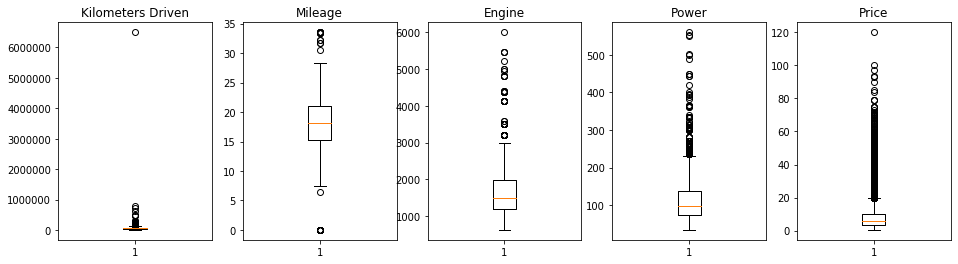

In [0]:
### Outlier 확인

fig, ax = plt.subplots(1,5,figsize=(16,4))
ax[0].boxplot(list(clean_data.Kilometers_Driven))
ax[0].set_title("Kilometers Driven")

ax[1].boxplot(clean_data.Mileage)
ax[1].set_title("Mileage")

ax[2].boxplot(clean_data.Engine)
ax[2].set_title("Engine")
    
ax[3].boxplot(list(clean_data.Power))
ax[3].set_title("Power")
    
ax[4].boxplot(list(clean_data.Price))
ax[4].set_title("Price")
    
plt.show() # kilo가 6000000이상인 것 확인됨

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


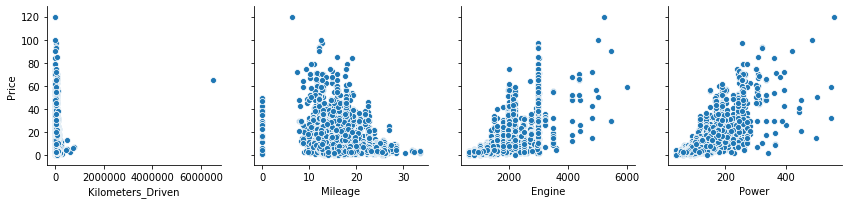

In [0]:
sns.pairplot(data=clean_data, x_vars=['Kilometers_Driven', 'Mileage', 'Engine', 'Power'], y_vars='Price', size=3)

In [0]:
# kilo 6000000 삭제

idx = []
lt = list(clean_data["Kilometers_Driven"])
for i in range(len(lt)):   
    if( lt[i] > 1000000):
        idx.append(i)
clean_data = clean_data.drop(idx)
clean_data = clean_data.reset_index(drop = True)

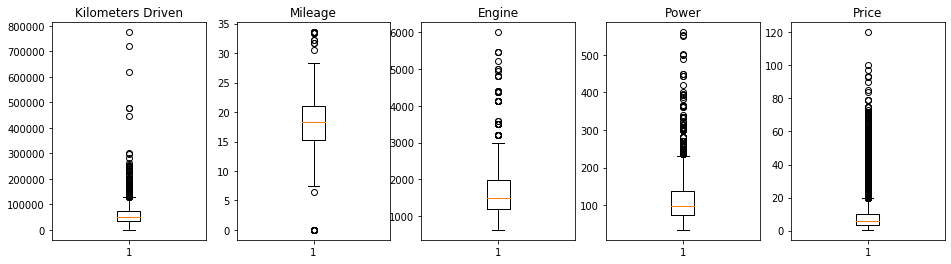

In [0]:
fig, ax = plt.subplots(1,5,figsize=(16,4))
ax[0].boxplot(list(clean_data.Kilometers_Driven))
ax[0].set_title("Kilometers Driven")

ax[1].boxplot(clean_data.Mileage)
ax[1].set_title("Mileage")

ax[2].boxplot(clean_data.Engine)
ax[2].set_title("Engine")
    
ax[3].boxplot(list(clean_data.Power))
ax[3].set_title("Power")
    
ax[4].boxplot(list(clean_data.Price))
ax[4].set_title("Price")
    
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


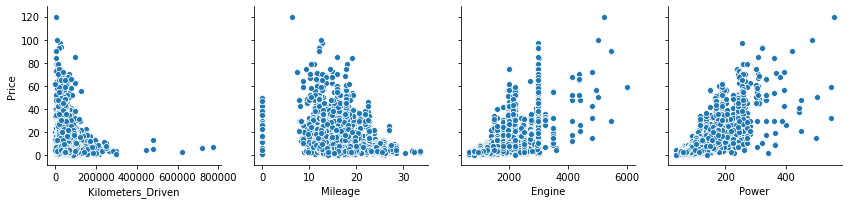

In [0]:
sns.pairplot(data=clean_data, x_vars=['Kilometers_Driven', 'Mileage', 'Engine', 'Power'], y_vars='Price', size=3)

In [0]:
### train 데이터 생성

y = clean_data[['Price']].to_numpy()
clean_data = clean_data.drop(columns=['Price'])

In [0]:
x = clean_data.values
columns = clean_data.columns

# Scale (x값만)
scaler = preprocessing.MinMaxScaler()
tmp = scaler.fit_transform(x)
clean_data = pd.DataFrame(tmp)
clean_data.columns = columns

x = clean_data.to_numpy()

In [0]:
# data split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=1)

In [0]:
### 모델링 -> 다중 선형 회귀 사용 y = w1*x1 + w2*x2 +....+ b

lr = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
# train data 정확도 R2(R-squared) 측정
print('Train dats\'s Accuracy : ', format(lr.score(x_train, y_train)))

Train dats's Accuracy :  0.8011629967783105


In [0]:
y_predict = lr.predict(x_test)

In [0]:
# test dats 정확도 R2(R-squared) 측정
print('Test dats\'s Accuracy : ', format(lr.score(x_test,y_test)))
print('Test dats\'s Accuracy : ', format(r2_score(y_test,lr.predict(x_test))))

Test dats's Accuracy :  0.8107960180975304
Test dats's Accuracy :  0.8107960180975304


Train acc와 Test acc의 값이 거의 유사하다. overfitting은 일어나지 않았으나 test data 사이즈를 늘이거나 random state를 바꾸면 test acc가 급격히 떨어진다..

In [0]:
mean_absolute_error(y_test, y_predict)

2.9624031980144676

Price의 오차 296000루피 한화 480 만원..